In [5]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
(train_images,train_labels),(test_images,test_labels) =  datasets.cifar10.load_data()
train_images = train_images/255
test_images = test_images/255

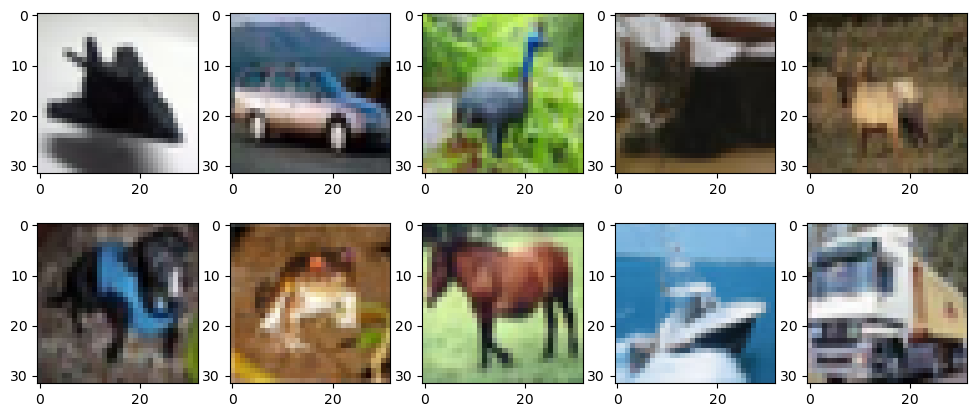

In [15]:
plt.figure(figsize=(12,5))
for i in range (10):
    index = np.where(train_labels==i)[0][0]
    plt.subplot(2,5, i+1)
    plt.imshow(train_images[index])
    plt.show

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))          
          
          

C:\Users\pawar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile( 
    optimizer= keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy,
    metrics=[keras.metrics.Accuracy]
)

In [61]:
history = model.fit(
    train_images,
    train_labels,
    epochs=2,
    verbose='auto',
    validation_data=(test_images,test_labels)    
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0000e+00 - loss: 3.9392 - val_accuracy: 0.0000e+00 - val_loss: 2.3035
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0000e+00 - loss: 2.3108 - val_accuracy: 0.0000e+00 - val_loss: 2.3026


In [62]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,256 (860.38 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 146,838 (573.59 KB)

In [63]:
x_loss, x_acc = model.evaluate(test_images, test_labels)
print(x_loss)
print(x_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 2.3026
2.30259108543396
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

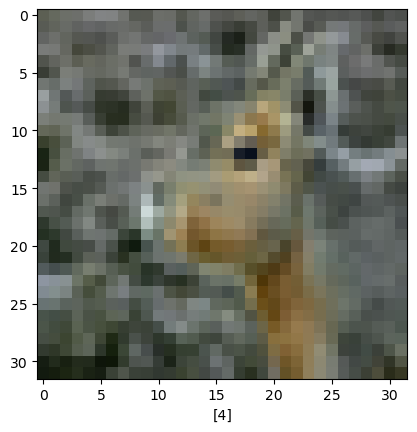

In [74]:
n = random.randint(0,9999)
plt.imshow(test_images[n])
plt.xlabel(test_labels[n])
plt.show
